In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
df_index = pd.read_csv('economic-index.csv')
df_index.head()

,index,year,month,interest_rate,unemployment_rate,index_price
0,0,2023,7,4.6,4.9,1595
1,1,2024,5,5.2,3.8,1675
2,2,2025,4,6.4,2.5,1785
3,3,2023,12,4.5,4.2,1625
4,4,2025,2,6.1,2.9,1765


In [10]:
## Drop unnecessary columns
df_index.drop(columns = ['index', 'year', 'month'],axis = 1, inplace = True)

In [11]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,4.6,4.9,1595
1,5.2,3.8,1675
2,6.4,2.5,1785
3,4.5,4.2,1625
4,6.1,2.9,1765


In [12]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

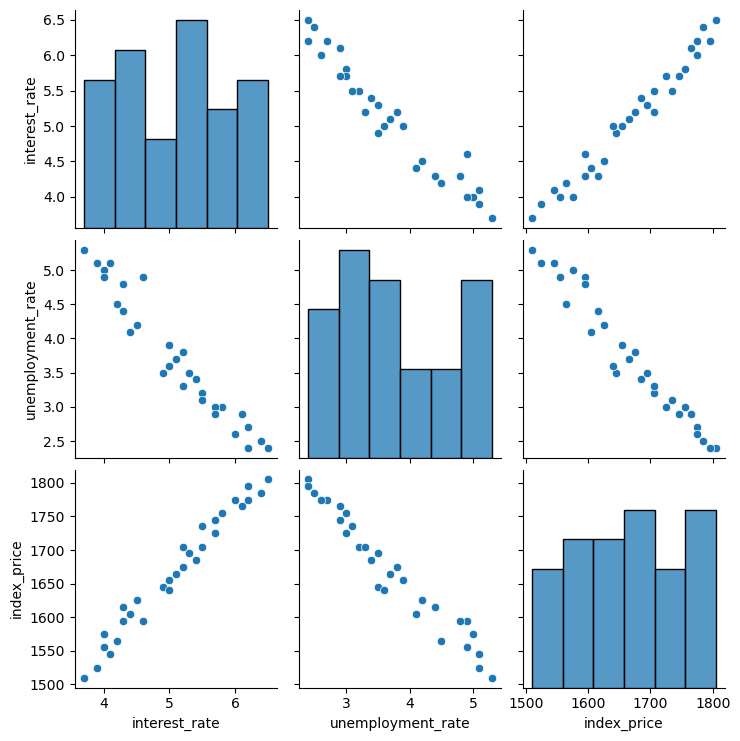

In [13]:
## Visualization
sns.pairplot(df_index)

In [14]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.968996,0.984979
unemployment_rate,-0.968996,1.000000,-0.976070
index_price,0.984979,-0.976070,1.000000


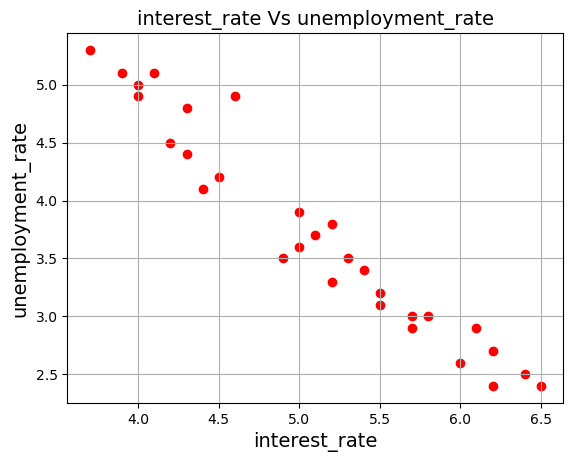

In [16]:
## Visualize the datapoints more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color = 'red')
plt.title('interest_rate Vs unemployment_rate', fontsize = 14)
plt.xlabel('interest_rate', fontsize = 14)
plt.ylabel('unemployment_rate', fontsize = 14)
plt.grid(True)
plt.show()

In [17]:
## Independent and Dependent features
X = df_index.iloc[:, :-1]
y = df_index.iloc[:, -1]

In [18]:
X.head()

,interest_rate,unemployment_rate
0,4.6,4.9
1,5.2,3.8
2,6.4,2.5
3,4.5,4.2
4,6.1,2.9


In [19]:
y.head()

0    1595
1    1675
2    1785
3    1625
4    1765
Name: index_price, dtype: int64

In [20]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

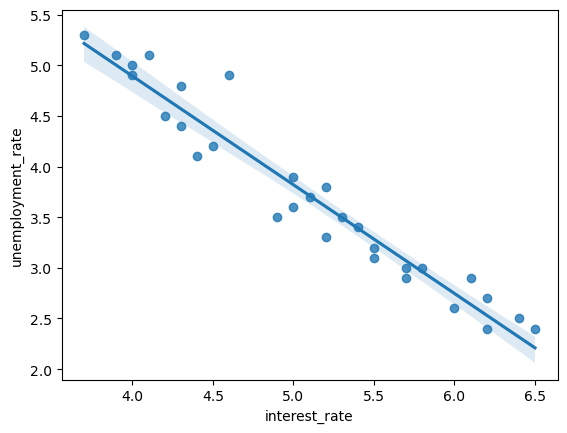

In [26]:
sns.regplot(x = 'interest_rate', y = 'unemployment_rate', data = df_index)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
X_train, X_test

(array([[-1.02259389,  1.29331608],
        [-0.45160238,  1.08486953],
        [ 1.26137216, -0.99959594],
        [ 1.37557047, -1.20804249],
        [-0.10900747, -0.3742563 ],
        [ 1.71816538, -1.52071231],
        [ 0.46198404, -0.47847957],
        [-1.1367922 ,  1.08486953],
        [ 0.23358744, -0.06158648],
        [ 1.60396707, -1.41648904],
        [ 0.00519083, -0.27003303],
        [-0.56580068,  0.35530661],
        [ 0.80457895, -0.99959594],
        [-0.90839559,  0.66797643],
        [ 0.11938913, -0.16580975],
        [-1.47938711,  1.50176262],
        [ 1.37557047, -1.52071231],
        [ 0.57618235, -0.68692612],
        [-1.2509905 ,  1.29331608],
        [-0.67999899,  0.25108334],
        [-0.79419729,  0.98064626],
        [-1.1367922 ,  1.1890928 ]]),
 array([[ 0.34778574, -0.3742563 ],
        [ 0.80457895, -0.89537267],
        [ 1.14717386, -1.31226576],
        [-0.79419729,  0.56375316],
        [ 0.91877726, -0.89537267],
        [ 0.00519083,  0.0

In [29]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [30]:
regression.fit(X_train, y_train)

LinearRegression()

In [34]:
# Cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 3)

In [35]:
np.mean(validation_score)

-160.30892448934577

In [36]:
## Prediction
y_pred = regression.predict(X_test)

In [37]:
y_pred

array([1685.83106084, 1728.74438589, 1761.48279315, 1586.29553692,
       1736.70564976, 1653.09265357, 1682.2971048 , 1710.60820424])

In [38]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE is", mse)
print("MAE is", mae)
print("RMSE is", rmse)

MSE is 319.181665554726
MAE is 15.30392282494222
RMSE is 17.865656034826316


In [42]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("R2 Score is", score)

score = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1]-1)
print("Adjusted R2 is",score)

R2 Score is 0.8680385878843511
Adjusted R2 is 0.8152540230380915


Assumptions

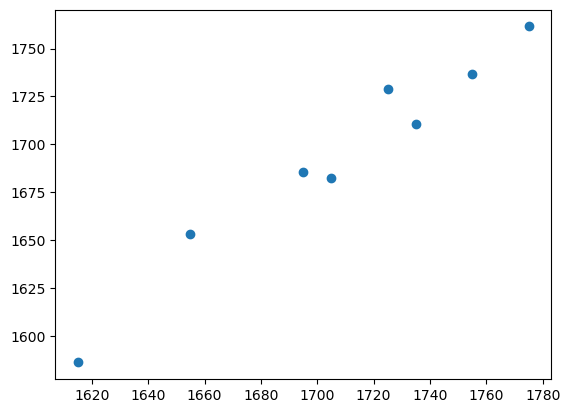

In [43]:
plt.scatter(y_test, y_pred)

In [44]:
residuals = y_test - y_pred
print(residuals)

27     9.168939
15    -3.744386
23    13.517207
17    28.704463
8     18.294350
9      1.907346
28    22.702895
24    24.391796
Name: index_price, dtype: float64


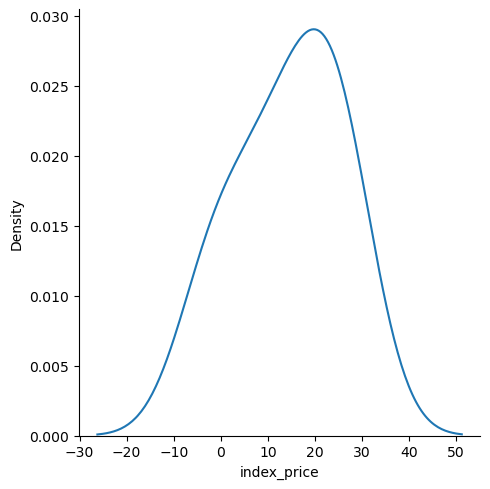

In [45]:
## Plot this residuals
sns.displot(residuals, kind = 'kde')

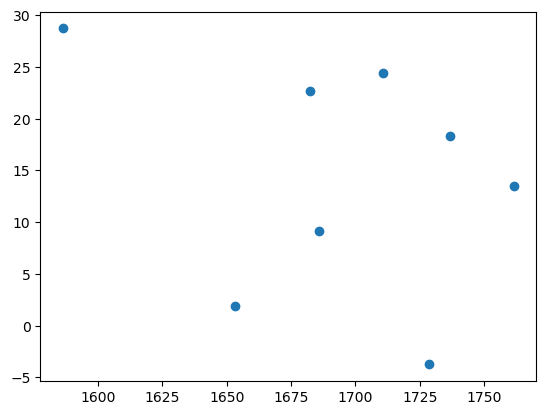

In [46]:
## Scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

In [48]:
## OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.097
Method:                 Least Squares   F-statistic:                            0.02991
Date:                Fri, 11 Oct 2024   Prob (F-statistic):                       0.971
Time:                        18:45:16   Log-Likelihood:                         -194.25
No. Observations:                  22   AIC:                                      392.5
Df Residuals:                      20   BIC:                                      394.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            69.7144   1487.771      0.047      0.963   -3033.722    3173.151
x2           -21.2395   1487.771     -0.014      0.989   -3124.676    3082.197
==============================================================================
Omnibus:                        1.370   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.504   Jarque-Bera (JB):                1.209
Skew:                           0.509   Prob(JB):                        0.546
Kurtosis:                       2.467   Cond. No.                         7.92
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
print(regression.coef_)

[ 69.71437984 -21.23953548]
